# Persistence Diagrams Demonstration

We demonstrate how to use various Python packages to compute and display persistence diagrams. We use the standard Python packages matplotlib, numpy, sklearn as well as the specialized (for TDA) packages ripser and persim. Ripser and persim need to be pip installed before running this notebook.

This is a fleshed out version of the demonstration available at https://github.com/scikit-tda/ripser.py

In [1]:
# Import packages
from ripser import ripser
from ripser import Rips
# ripser is a package for computing barcodes from Vietoris-Rips complexes
from persim import plot_diagrams 
# persim is a package for displaying and computing distances between persistence diagrams
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
# The above are for producing scatterplots of our data
import numpy as np
from sklearn import datasets
# These are standard packages for linear algebra and statistics

We begin by defining a toy dataset. Let's just take a bunch of random points in the plane.

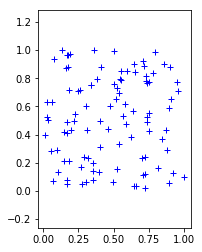

In [2]:
data = np.random.random((100,2)) # Define a random point cloud of 100 points in the plane
fig = pl.figure() # Create a figure to display the random point cloud
ax1 = fig.add_subplot(121)
ax1.plot(data[:, 0], data[:, 1],'+b') # Plot the data on the axes. +b plots as a scatter plot of blue + signs.
ax1.axis('equal'); # Set the aspect ratio to use equal axis scales.

Now we compute the persistent homology of the Vietoris-Rips complex of the dataset. This is done by applying the ripser function. Ripser has lots of options, such as range of dimensions to compute, type of data etc. If we don't specify anything, then it will run the computation assuming the data is a pointcloud (which it is, in our case).

In [3]:
ripserData = ripser(data)

Let's take a look at the output of ripser. We see that it computes a bunch of stuff, but what we are really interested in is the 'dgms' portion of its output.

In [4]:
ripserData

{'cocycles': [[], []], 'dgms': [array([[0.        , 0.0011682 ],
         [0.        , 0.00489496],
         [0.        , 0.00810844],
         [0.        , 0.01112776],
         [0.        , 0.01198778],
         [0.        , 0.01237093],
         [0.        , 0.01589811],
         [0.        , 0.0169257 ],
         [0.        , 0.01910158],
         [0.        , 0.02003103],
         [0.        , 0.02077129],
         [0.        , 0.02136806],
         [0.        , 0.02182616],
         [0.        , 0.02893089],
         [0.        , 0.02933988],
         [0.        , 0.0300695 ],
         [0.        , 0.03083699],
         [0.        , 0.0315    ],
         [0.        , 0.0326739 ],
         [0.        , 0.03338818],
         [0.        , 0.03341354],
         [0.        , 0.03477744],
         [0.        , 0.03641743],
         [0.        , 0.03872602],
         [0.        , 0.03897827],
         [0.        , 0.04341659],
         [0.        , 0.04350129],
         [0.        , 0.0

In [5]:
diagrams = ripser(data)['dgms'] # Pick off the dgms part of the ripser output
print(diagrams) # Look at the the output

[array([[0.        , 0.0011682 ],
       [0.        , 0.00489496],
       [0.        , 0.00810844],
       [0.        , 0.01112776],
       [0.        , 0.01198778],
       [0.        , 0.01237093],
       [0.        , 0.01589811],
       [0.        , 0.0169257 ],
       [0.        , 0.01910158],
       [0.        , 0.02003103],
       [0.        , 0.02077129],
       [0.        , 0.02136806],
       [0.        , 0.02182616],
       [0.        , 0.02893089],
       [0.        , 0.02933988],
       [0.        , 0.0300695 ],
       [0.        , 0.03083699],
       [0.        , 0.0315    ],
       [0.        , 0.0326739 ],
       [0.        , 0.03338818],
       [0.        , 0.03341354],
       [0.        , 0.03477744],
       [0.        , 0.03641743],
       [0.        , 0.03872602],
       [0.        , 0.03897827],
       [0.        , 0.04341659],
       [0.        , 0.04350129],
       [0.        , 0.0452074 ],
       [0.        , 0.04642747],
       [0.        , 0.04800139],
       [0

We see that the output of diagrams is a pair of arrays. These are points in the persistence diagram for degree-0 and degree-1 persistent homology, respectively. We can now plot these diagrams. This can be done on separate axes, or on the same axis.

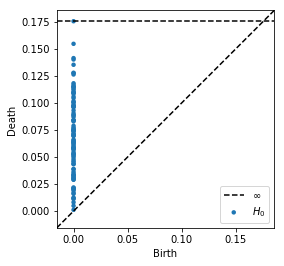

In [6]:
plot_diagrams(diagrams[0]) # Just degree-0

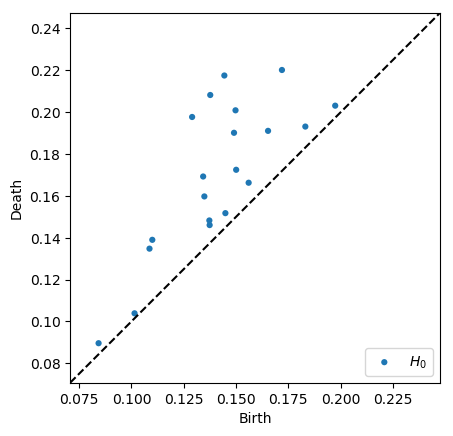

In [9]:
plot_diagrams(diagrams[1]) # Just degree-1

In [10]:
diagrams[1]

array([[0.19736958, 0.20310262],
       [0.1830968 , 0.19311979],
       [0.1719196 , 0.22015226],
       [0.16527994, 0.19106521],
       [0.15600981, 0.1662849 ],
       [0.15004762, 0.17247045],
       [0.14973803, 0.20088567],
       [0.1490185 , 0.19014487],
       [0.14489707, 0.1517477 ],
       [0.14440238, 0.21751384],
       [0.13766268, 0.20819938],
       [0.13737065, 0.14605115],
       [0.13723579, 0.14825061],
       [0.1348488 , 0.15973596],
       [0.13427241, 0.16926038],
       [0.12899989, 0.19769716],
       [0.10997557, 0.1390055 ],
       [0.10863584, 0.13478848],
       [0.10149298, 0.10389315],
       [0.08431094, 0.08960704]])

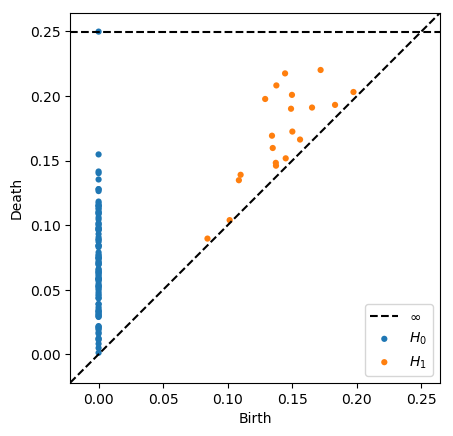

In [11]:
plot_diagrams(diagrams) # Both degree-0 and degree-1

Let's look at some other examples. First we define a function to randomly sample from Euclidean spheres. Then we sample 250 points from a sphere in 3-space and plot the result.

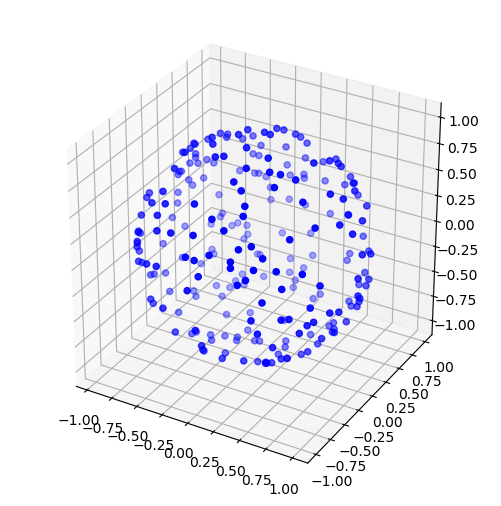

In [12]:
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    vec = np.transpose(vec)
    return vec

sphere250 = sample_spherical(250)

fig = pl.figure()
ax = Axes3D(fig)
ax.scatter(sphere250[:,0],sphere250[:,1],sphere250[:,2], c='b', marker='o');
ax.set_aspect('equal');

Now let's compute the persistence diagrams for the data. We can specify that we want to compute homology up to degree-2. We then plot the persistence diagrams on the same axes.

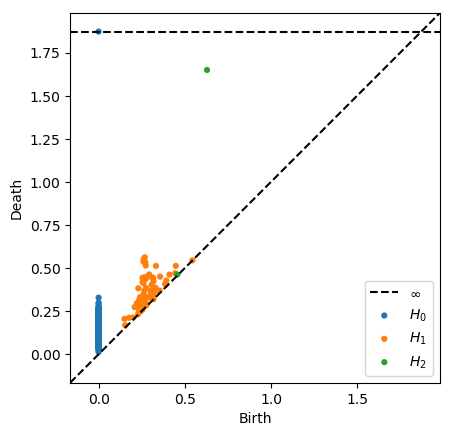

In [13]:
diagrams = ripser(sphere250,maxdim=2)['dgms']
plot_diagrams(diagrams)

Observe in the persistence diagrams that there is one highly persistent 0-cycle and a single 2-cycle. These reflect the topology of the sphere. Since 250 points sparsely covers the sphere, we see there are lots of spurious loops which form and die out quickly in the Vietoris-Rips complex. Let's see what happens if we sample the sphere more densely.

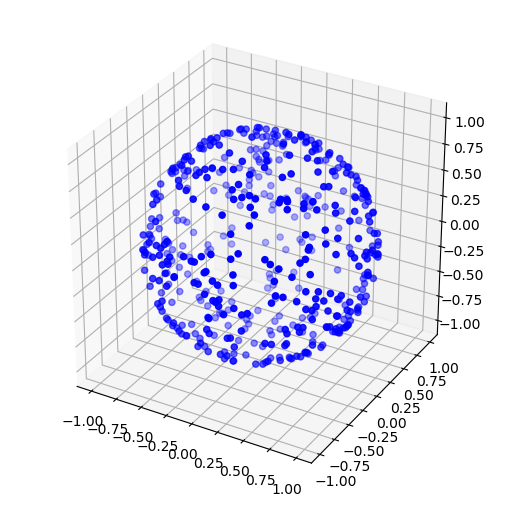

In [14]:
sphere500 = sample_spherical(500)

fig = pl.figure()
ax = Axes3D(fig)
ax.scatter(sphere500[:,0],sphere500[:,1],sphere500[:,2], c='b', marker='o');
ax.set_aspect('equal');

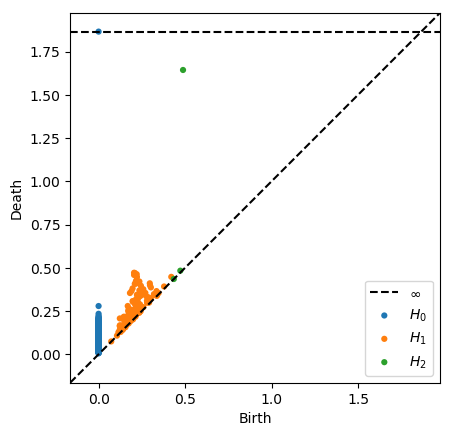

In [15]:
diagrams = ripser(sphere500,maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)

The above diagrams show that the more densely sampled sphere has much more pronounced persistent features. Now let's look at "noisy" samples from a circle. We create a noisy circle using a function from the "datasets" function from the "sklearn" package.

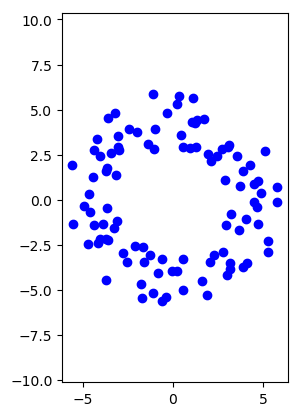

In [18]:
data = datasets.make_circles(n_samples=100)[0] + 5 * datasets.make_circles(n_samples=100)[0] 
# Generate the noisy circle.

# Plot the data as a scatter plot.
fig = pl.figure()
ax1 = fig.add_subplot(121)
ax1.plot(data[:, 0], data[:, 1], 'ob', label='Source samples');
ax1.axis('equal');

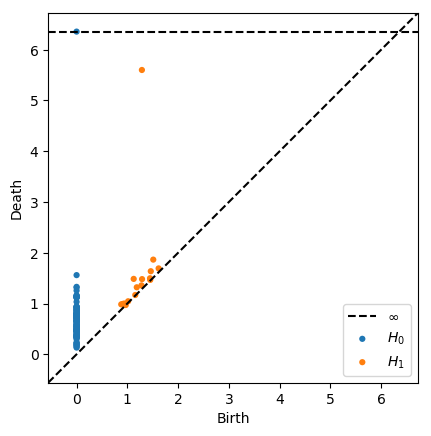

In [19]:
dgms = ripser(data)['dgms']
plot_diagrams(dgms, show=True)

Playing with parameters, we can make the circle more densely sampled or much noisier.

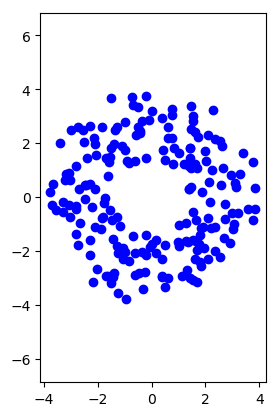

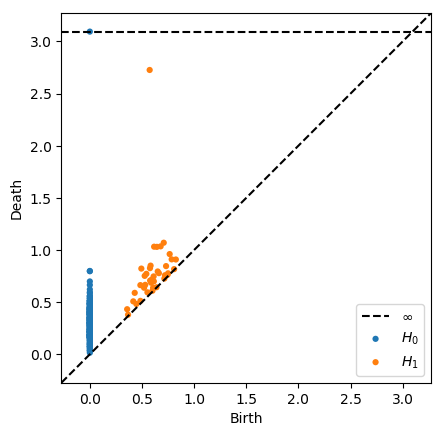

In [33]:
numsamp = 200
noiseLevel = 3

data = datasets.make_circles(n_samples=numsamp)[0] + noiseLevel * datasets.make_circles(n_samples=numsamp)[0] 

fig = pl.figure()
ax1 = fig.add_subplot(121)
ax1.plot(data[:, 0], data[:, 1], 'ob');
ax1.axis('equal')
dgms = ripser(data)['dgms']
fig2 = pl.figure()
plot_diagrams(dgms, show=True)

By default, ripser computes persistent homology over the integer ring (which we haven't covered in class). We can force it to compute over the field with two elements (also called Z/2Z) using the following commands.

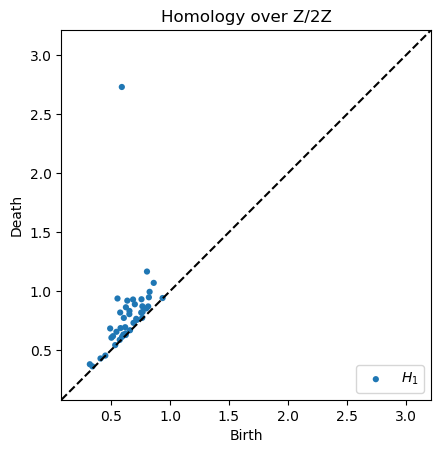

In [21]:
# Homology over Z/2Z
dgms = ripser(data, coeff=2)['dgms']
plot_diagrams(dgms, plot_only=[1], title="Homology over Z/2Z", show=True)

Another option in Ripser is to display the persistance diagram tilted so that the x=y line becomes the x-axis. This is called a "Lifetime" persistence diagram.

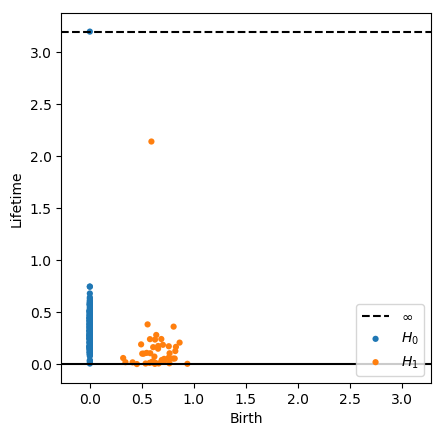

In [22]:
plot_diagrams(dgms, lifetime=True)